**Introduction/Problem Statement**

The Chief Financial Officer (CFO) of Amazing Movie Studio seeks to secure $100 million in funding from an investor to finance their upcoming movie project slated for release in 2025. To ensure optimal return on investment, the CFO aims to strategically allocate resources towards movie genres, production countries, and budget allocation that are most likely to yield substantial revenue.

In order to make informed decisions, the CFO plans to conduct a comprehensive data analysis of the studio's historical movie data. By leveraging insights from past performances, the CFO aims to identify lucrative opportunities and mitigate risks associated with the new project.

The analysis will focus on exploring correlations and trends within the dataset.

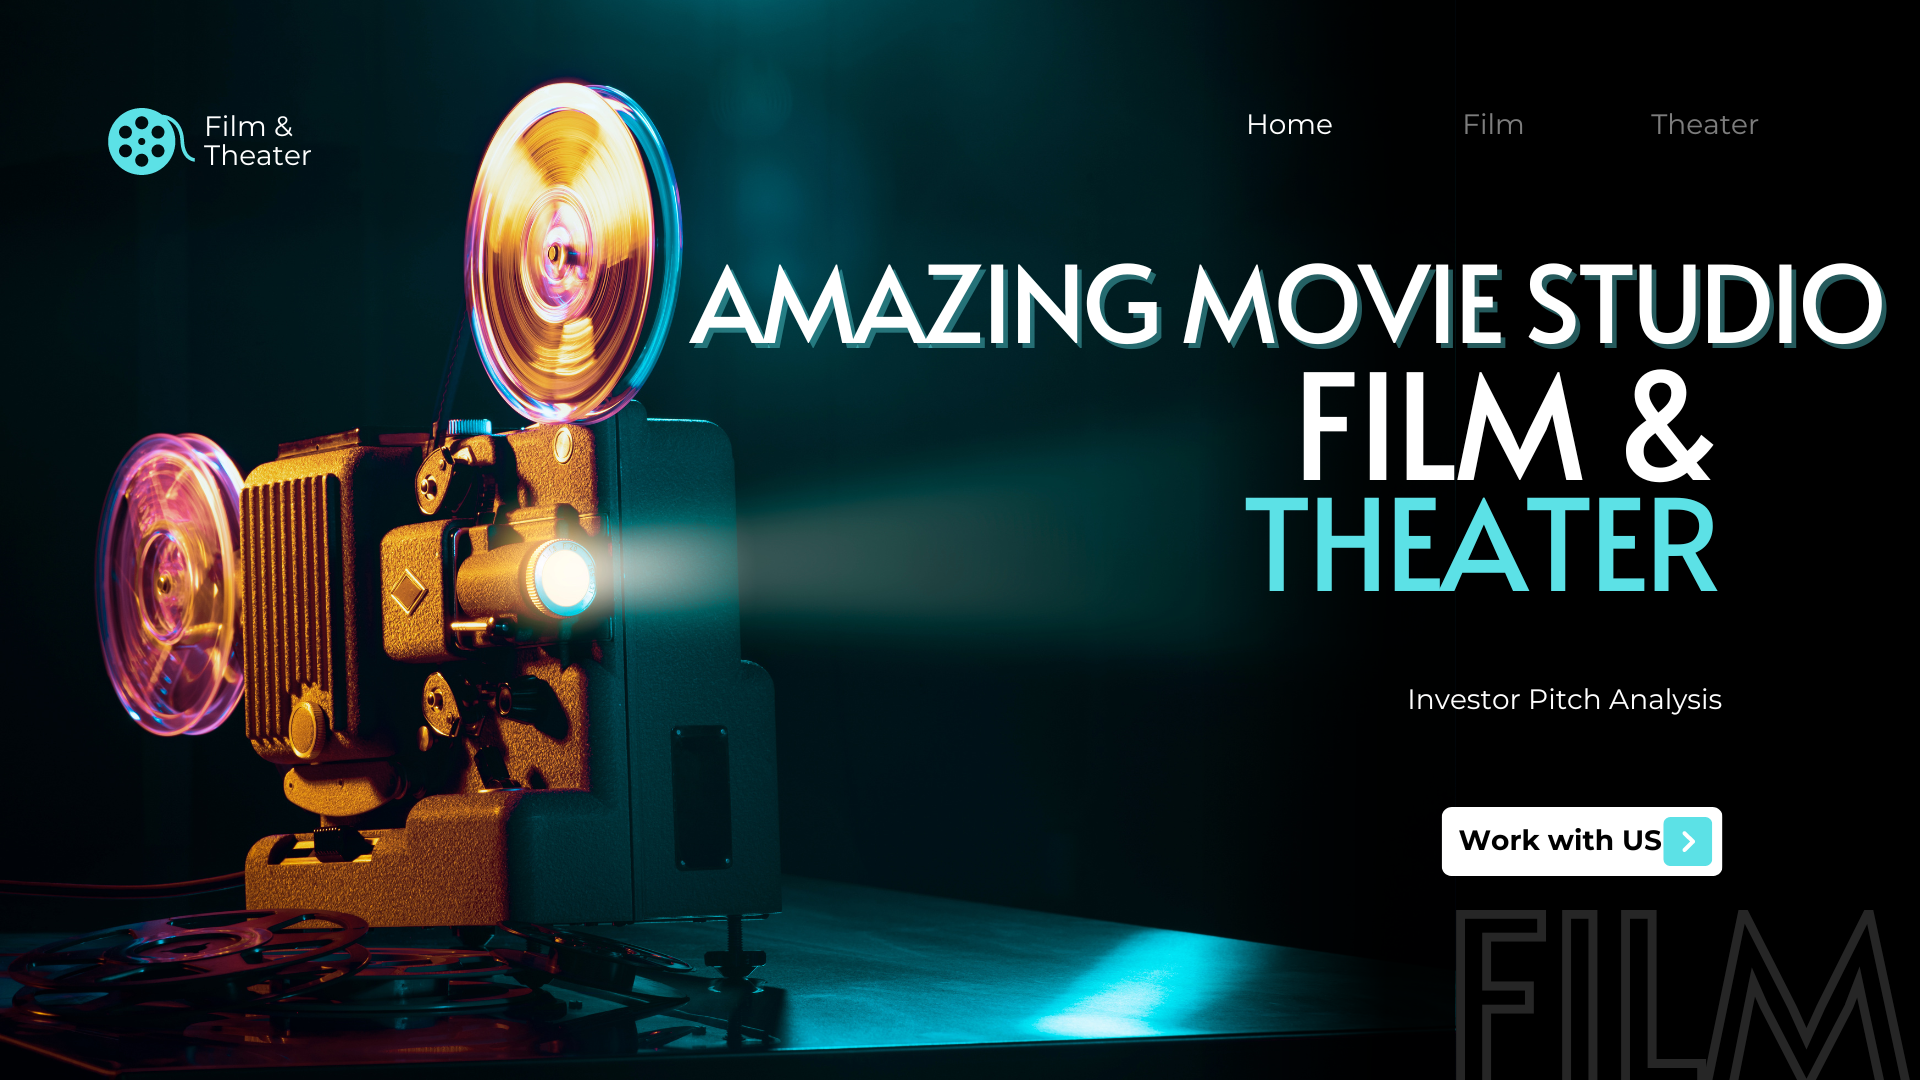

**•	Data Dictionary:**

•	names: The names of the movies (titles).

•	date_x: The date associated with the movie (release date or another relevant date).

•	rate_ score: The IMDb rating of the movie.The Metascore rating of the movie.

•	genre: The genre(s) of the movie (e.g., Drama, Action, Comedy, etc.).

•	overview: A brief overview or summary of the movie's plot.

•	crew: Information about the movie's crew (directors, writers, producers, etc.).

•	orig_title: The original title of the movie (if different from the title).

•	status: The current status of the movie (e.g., released, in production, canceled).

•	orig_lang: The original language of the movie.

•	budget_x: The estimated budget of the movie.

•	revenue: The revenue earned by the movie.

•	country: The country where the movie was produced or originated from.



**Importing Libraries:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the Dataset:**

In [ ]:
# reading the csv file
df = pd.read_csv("/content/Python Project IMDB movies dataset.csv")

# top five rows
df.head()

,names,date_x,rate_ score,genre,overview,crew,orig_title,status,orig_lang,budget_x ($),revenue ($),country
0,Creed III,3/2/2023,73,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,4/5/2023,76,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,1/5/2023,70,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,3/17/2023,61,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


**Data Exploration:**

In [ ]:
# shape of data or no of rows and columns
df.shape

(10178, 12)

In [ ]:
# Info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   names         10178 non-null  object 
 1   date_x        10178 non-null  object 
 2   rate_ score   10178 non-null  int64  
 3   genre         10093 non-null  object 
 4   overview      10178 non-null  object 
 5   crew          10122 non-null  object 
 6   orig_title    10178 non-null  object 
 7   status        10178 non-null  object 
 8   orig_lang     10178 non-null  object 
 9   budget_x ($)  10178 non-null  float64
 10  revenue ($)   10178 non-null  float64
 11  country       10178 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 954.3+ KB


In [ ]:
#statistical summary
df.describe()

,rate_ score,budget_x ($),revenue ($)
count,10178.000000,1.017800e+04,1.017800e+04
mean,63.497052,6.488238e+07,2.531401e+08
std,13.537012,5.707565e+07,2.777880e+08
min,0.000000,1.000000e+00,0.000000e+00
25%,59.000000,1.500000e+07,2.858898e+07
50%,65.000000,5.000000e+07,1.529349e+08
75%,71.000000,1.050000e+08,4.178021e+08
max,100.000000,4.600000e+08,2.923706e+09


**Data Cleaning**

**Missing values**

In [ ]:
df.isnull().sum()

names            0
date_x           0
rate_ score      0
genre           85
overview         0
crew            56
orig_title       0
status           0
orig_lang        0
budget_x ($)     0
revenue ($)      0
country          0
dtype: int64

In [ ]:
(df.isnull().sum() * 100 )/df.shape[0]

In [ ]:
#Removing missing values due to it`s minor presence compared to the dataset
df.dropna(inplace=True)

In [ ]:
df["genre"].unique()

array(['Drama,\xa0Action', 'Science Fiction,\xa0Adventure,\xa0Action',
       'Animation,\xa0Adventure,\xa0Family,\xa0Fantasy,\xa0Comedy', ...,
       'Adventure,\xa0Comedy,\xa0Family,\xa0Science Fiction,\xa0Action',
       'Mystery,\xa0Thriller,\xa0Comedy',
       'Action,\xa0Adventure,\xa0Science Fiction,\xa0Thriller,\xa0Horror'],
      dtype=object)

In [ ]:
df["MovieType"] = df["genre"].str.split(",", n=1).str[0]


In [ ]:
df['MovieType'].unique()

array(['Drama', 'Science Fiction', 'Animation', 'Action', 'Thriller',
       'Horror', 'Comedy', 'War', 'Documentary', 'Crime', 'Family',
       'Adventure', 'Fantasy', 'Music', 'Mystery', 'Western', 'Romance',
       'TV Movie', 'History'], dtype=object)

In [ ]:
df["actors"] = df["crew"].str.split(",", n=1).str[0]


In [ ]:
df['actors'].unique()

array(['Michael B. Jordan', 'Sam Worthington', 'Chris Pratt', ...,
       'Annette Bening', 'Larry Drake', 'Nina Herzog'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10052 entries, 0 to 10177
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   names         10052 non-null  object 
 1   date_x        10052 non-null  object 
 2   rate_ score   10052 non-null  int64  
 3   genre         10052 non-null  object 
 4   overview      10052 non-null  object 
 5   crew          10052 non-null  object 
 6   orig_title    10052 non-null  object 
 7   status        10052 non-null  object 
 8   orig_lang     10052 non-null  object 
 9   budget_x ($)  10052 non-null  float64
 10  revenue ($)   10052 non-null  float64
 11  country       10052 non-null  object 
 12  MovieType     10052 non-null  object 
 13  actors        10052 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 1.2+ MB


**Incorrect Data Types**

In [ ]:
df["date_x"] = pd.to_datetime(df["date_x"])

In [ ]:
df['date_x'].info()

<class 'pandas.core.series.Series'>
Int64Index: 10052 entries, 0 to 10177
Series name: date_x
Non-Null Count  Dtype         
--------------  -----         
10052 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 157.1 KB


In [ ]:
# Extract the year from the release date
df['release_year'] = df['date_x'].dt.year

**Check for duplicates**

In [ ]:
df.duplicated().sum()

0

##**EDA**

### Can you show me the data distribution on how the movie watchers rated the movies produced by the studio and how this distribution indicates my investment will have good returns ?**

Text(0.5, 0, 'rate_score')

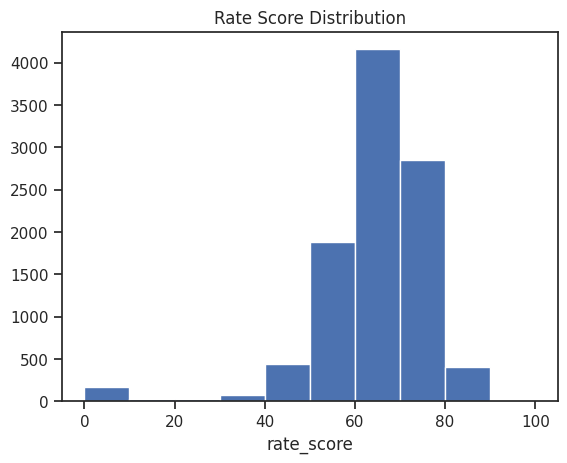

In [ ]:
plt.hist(df["rate_ score"])
plt.title("Rate Score Distribution")
plt.xlabel("rate_score")

**Insight:** the data distribution appears to be positively skewed distribution, which means that most of the movie watchers have a rate_score of 40 and above with the highest rate score of 60 - 70 by 4000 movie watchers, The rate score of movie increases from 40 and peaks at 60 - 70. This implies that most of their movies have a good rate_score and is a strong basis to invest in the movie studio.

# Correlation Plot

In [ ]:
# Creating corrleation matrix for sub columns
Sub_columns = df[['revenue ($)', 'budget_x ($)','rate_ score']]


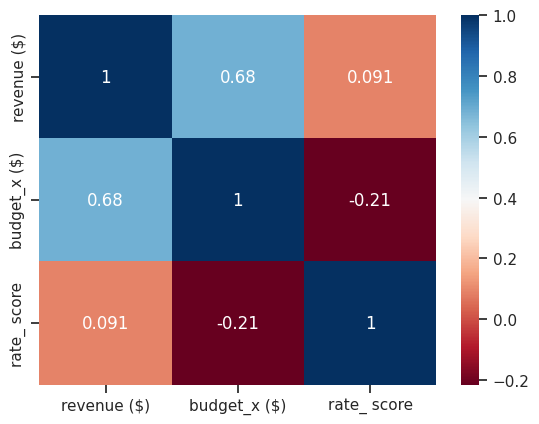

In [ ]:
# Plot the correlation matrix as a heatmap
sns.heatmap(Sub_columns.corr(), annot=True, cmap="RdBu")
plt.show()

From the graph , we can conclude that there is high correlation between revenue and budget 0.68.

### Is there a correlation between factors like budget and ratings? Do higher-budget productions tend to receive higher ratings?

Correlation coefficient between budget and ratings: -0.2143742867275624


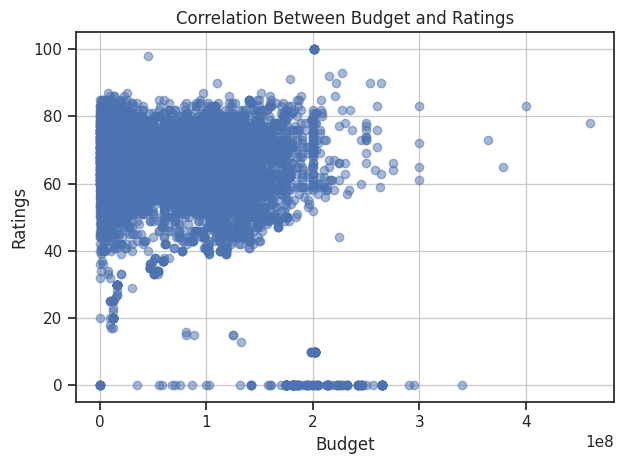

In [ ]:
plt.scatter(df['budget_x ($)'], df['rate_ score'], alpha=0.5)
plt.title('Correlation Between Budget and Ratings')
plt.xlabel('Budget')
plt.ylabel('Ratings')
plt.grid(True)
plt.tight_layout()

# Calculate correlation coefficient
correlation_coefficient = df['budget_x ($)'].corr(df['rate_ score'])
print("Correlation coefficient between budget and ratings:", correlation_coefficient)
plt.show()


*   1 indicates a perfect positive linear relationship
*   0 indicates no linear relationship
*   -1 indicates a perfect negative linear relationship

**Insight:** Since the correlation coefficient is negative and relatively close to 0, it suggests a weak negative correlation between the two factors being analyzed. Specifically, a correlation of approximately -0.21 implies that as one variable (in this case, budget) increases, the other variable (ratings) tends to decrease slightly, but the relationship is not very strong.

### How does budget allocation impact revenue generation?

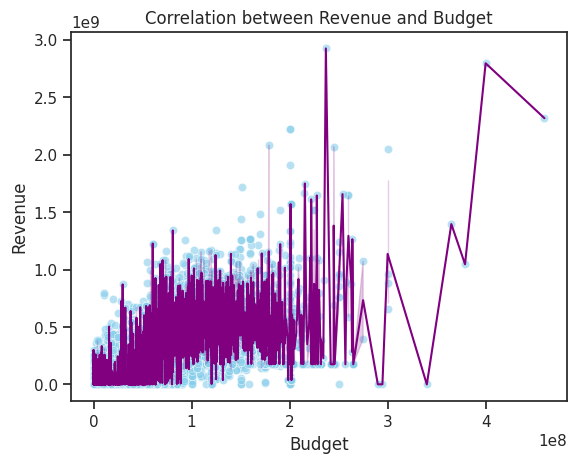

In [ ]:
sns.set_theme(style="ticks")
sns.scatterplot(data=df, x="budget_x ($)", y="revenue ($)", color="skyblue", marker='o', alpha=0.6)
sns.lineplot(data=df, x="budget_x ($)", y="revenue ($)", color="purple")
plt.title('Correlation between Revenue and Budget')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

**Insight:** It seems that there is a correlation between budget spent and revenue generated.

### How does Rate score allocation impact revenue generation?

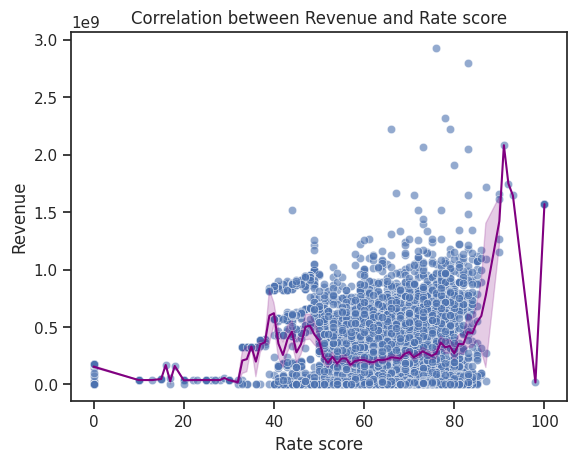

In [ ]:
sns.set_theme(style="ticks")
sns.scatterplot(data=df, x="rate_ score", y="revenue ($)", alpha=0.6)
sns.lineplot(data=df, x="rate_ score", y="revenue ($)", color="purple")
plt.title('Correlation between Revenue and Rate score')
plt.xlabel('Rate score')
plt.ylabel('Revenue')
plt.show()

**Insight:** We can`t seem to pinpoint if there is any correlation between revenue and rate_score from the scatter chart. We will have to use a barchart to measure if there is any relationship.

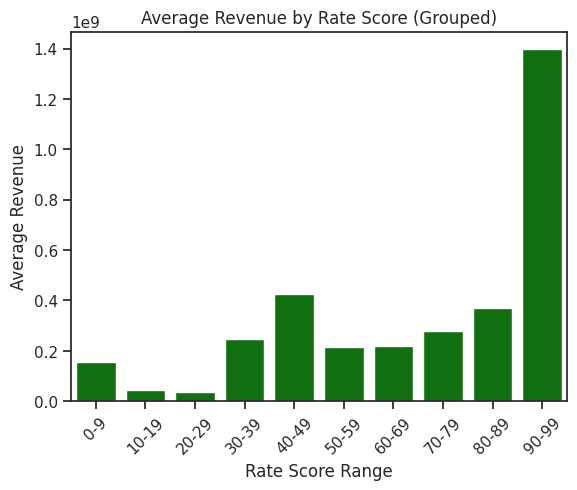

In [ ]:
bins = [i for i in range(0, 101, 10)]  # Creating bins from 0 to 100 with a step of 10
labels = [f"{i}-{i+9}" for i in range(0, 100, 10)]  # Creating labels for the bins (e.g., "0-9", "10-19", etc.)

# Group rate scores into bins
df['rate_score_bins'] = pd.cut(df['rate_ score'], bins=bins, labels=labels, right=False)

# Calculate the average revenue for each rate score bin
average_rev = df.groupby("rate_score_bins")["revenue ($)"].mean().reset_index()

# Now, plot the bar chart
sns.set_theme(style="ticks")
sns.barplot(data=average_rev, x="rate_score_bins", y="revenue ($)", color="green")
plt.title('Average Revenue by Rate Score (Grouped)')
plt.xlabel('Rate Score Range')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


**Insight:** From the bar chart we can see the rate_score of 90-99 has the highest average revenue.

Insight: There is no correlation between rate_score and budget.

### Are there any notable trends in revenue generation over time?

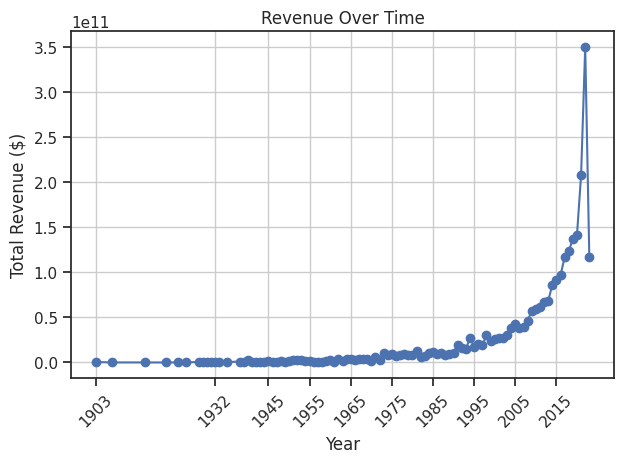

In [ ]:
revenue_over_time = df.groupby(df['date_x'].dt.year)['revenue ($)'].sum()

# Plot the revenue over time
plt.plot(revenue_over_time.index, revenue_over_time.values, marker='o', linestyle='-')
plt.title('Revenue Over Time')
plt.xlabel('Year')
plt.ylabel('Total Revenue ($)')
plt.grid(True)
plt.xticks(revenue_over_time.index[::10], rotation=45)  # Display every 10th year
plt.tight_layout()
plt.show()

We can note that there has been an increase in movie/TV_Shows production over the years.

### What is the revenue generated from movie industry over the last 10 years?

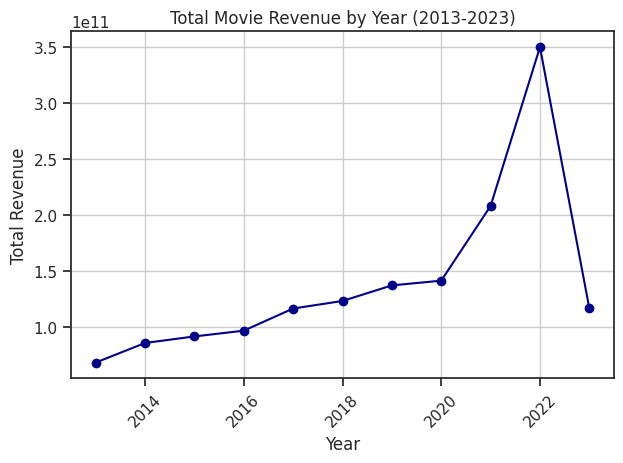

In [ ]:
revenue_by_year.plot(color='darkblue', marker='o')  # Adding markers for each data point
plt.title('Total Movie Revenue by Year (2013-2023)')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### What are the top 10 countries that generate the highest revenue?

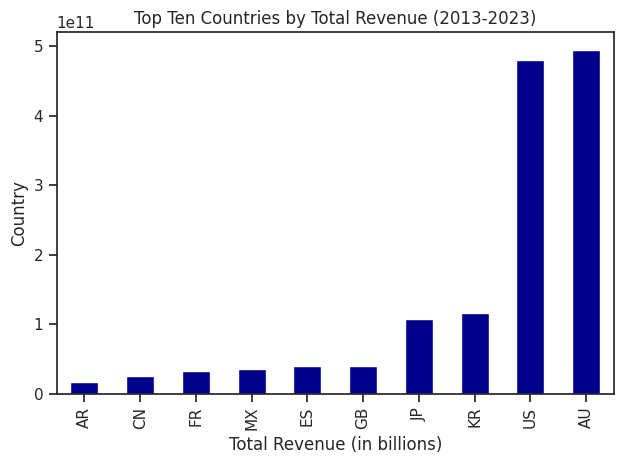

In [ ]:
top_ten_countries.sort_values().plot(kind='bar', color='darkblue')
plt.title('Top Ten Countries by Total Revenue (2013-2023)')
plt.xlabel('Total Revenue (in billions)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

**Insight:** The country that generates the highest total revenue is Austrailia followed by United States.

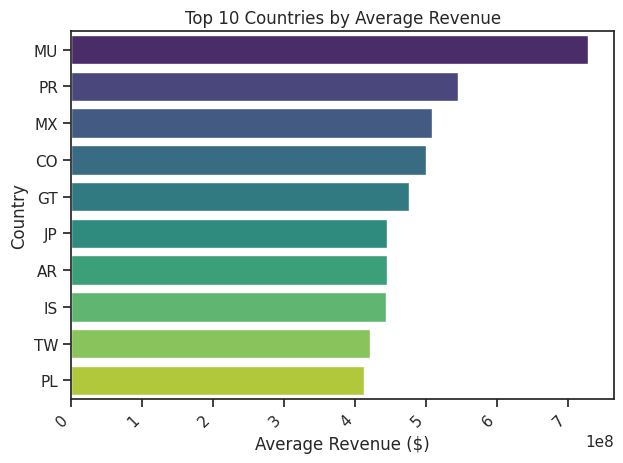

In [ ]:
avg_revenue_by_country =filtered_movies_df.groupby('country')['revenue ($)'].mean().sort_values(ascending=False)

# Select top 10 countries
top_10_countries = avg_revenue_by_country.head(10)

# Plot the bar chart with top 10 countries
sns.barplot(y=top_10_countries.index, x=top_10_countries.values,hue=top_10_countries.index,palette='viridis')
plt.title("Top 10 Countries by Average Revenue")
plt.xlabel('Average Revenue ($)')
plt.ylabel('Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insight:** The Country with highest average revenue is generated by Mauritius.

### Which language generates the highest revenue?

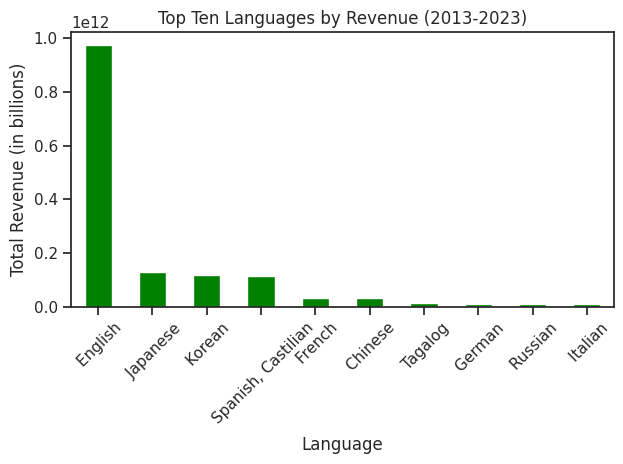

In [ ]:
revenue_by_language = relevant_years_df.groupby('orig_lang')['revenue ($)'].sum()
top_ten_languages = revenue_by_language.sort_values(ascending=False).head(10)

top_ten_languages.plot(kind='bar', color='green')
plt.title('Top Ten Languages by Revenue (2013-2023)')
plt.xlabel('Language')
plt.ylabel('Total Revenue (in billions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:** English language seems to bring in the highest total revenue across all languages.

### What genre is most popular among viewers?

Highest Rated Movie:  오르가즘 특강 2


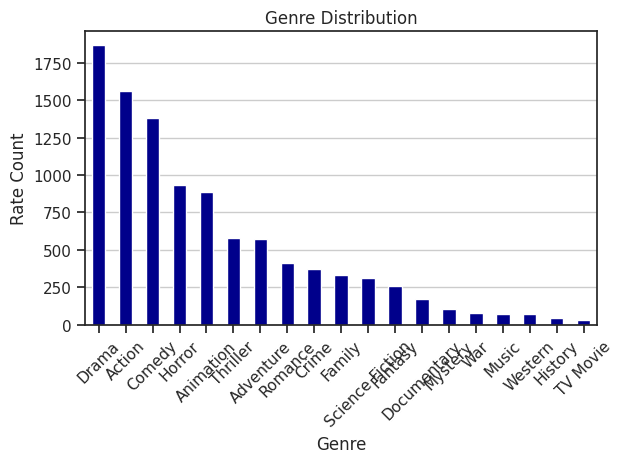

In [ ]:
highest_rated_movie = df.nlargest(1, 'rate_ score')
highest_rated_genre = highest_rated_movie['MovieType'].values[0]
print("Highest Rated Movie:", highest_rated_movie['orig_title'].values[0])

genre_counts = df['MovieType'].value_counts()

genre_counts.plot(kind='bar', color='darkblue')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Rate Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Most rated by viewers is the Drama genre.

### Top-rated movies/TV shows: What are the top-rated movies or TV shows according to user ratings? What are their genres?

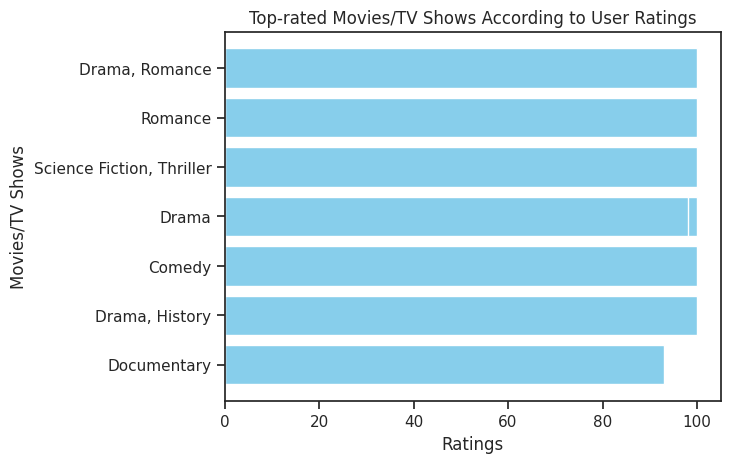

In [ ]:
sorted_df = df.sort_values(by='rate_ score', ascending=False)
top_rated = sorted_df[['genre', 'rate_ score']].head(10)

plt.barh(top_rated['genre'], top_rated['rate_ score'], color='skyblue')
plt.xlabel('Ratings')
plt.ylabel('Movies/TV Shows')
plt.title('Top-rated Movies/TV Shows According to User Ratings')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest rating at the top
plt.show()

**Insight:** Although there is no significant difference in the ratings of Movie/Tv shows, it appears the viewers watched less Documentaries compared to other programs.

### Trends over time: How have movie/TV trends evolved over the years in terms of genres?

<Figure size 1600x2000 with 0 Axes>

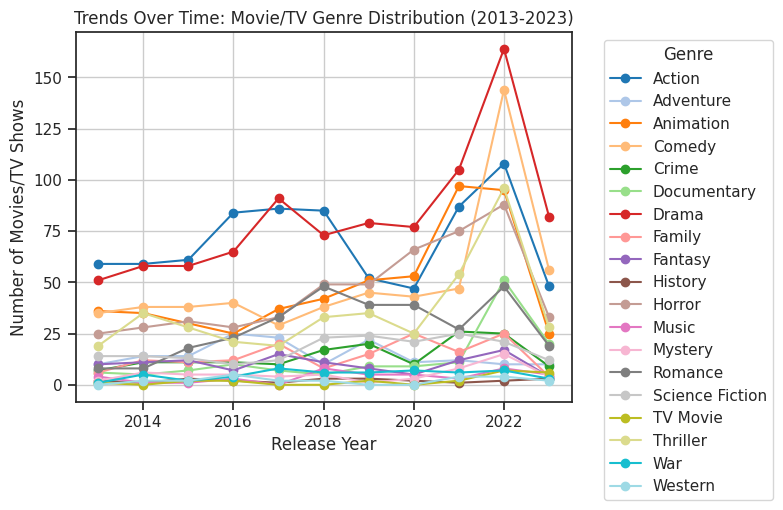

In [ ]:
filtered_movies_df = df[(df['release_year'] >= 2013) & (df['release_year'] <= 2023)]
genre_year_count = filtered_movies_df.groupby(['release_year', 'MovieType']).size().unstack(fill_value=0)

plt.figure(figsize=(16, 20))  # Adjust the figure size
genre_year_count.plot(kind='line', marker='o', cmap='tab20')



plt.title('Trends Over Time: Movie/TV Genre Distribution (2013-2023)')  # Update the title

plt.xlabel('Release Year')
plt.ylabel('Number of Movies/TV Shows')

plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.gca().set_aspect('auto')  # Set aspect ratio to

**Insight:** We can see that Drama has been dominant over the last 10 years.

### Impact of actors: Are there actors whose involvement consistently leads to higher-rated productions? Conversely, are there any whose involvement correlates with lower ratings?

## **Conclusions**

When working with the data from Amazing Movie Studio, we've uncovered fascinating insights that shed light on the studio's past performance and offer guidance for future endeavors.

As we assesed the rate scores given by movie watchers, the analysis shows a positively skewed distribution. It's clear the studio's movies are hitting the right notes with the audience, making it a compelling destination for investment.

As regards to finance, revenue and budget has a positive correlation of 0.68 suggesting that when the studio pumps more money into its productions, the revenue tends to follow suit. It's a promising sign that investing in high-budget projects could yield substantial returns.

Despite revenue and budget having a positive relationship, ratings  doesn`t seem to follow the same relationship, as the studio splurges more on a project, the ratings might take a slight dip. However, it's not a deal-breaker quality content still reigns supreme, and audiences are willing to overlook a few bumps in the budget road if the storytelling hits home.

Concerning the genres, Drama steals the spotlight, captivating audiences and dominating the scene for the past decade. But amidst the drama, documentaries seem to be taking a backseat viewership numbers suggest they're not getting the love they deserve.

## **Recommendations**

In our analysis of the past decade's data, we've distilled three essential strategies for maximizing Amazing Movie Studio's success:

Focus on Top Genres: Drama, Action, and Comedy consistently draw in audiences and drive revenue. Prioritizing productions in these genres will capitalize on existing audience preferences and ensure strong financial returns.

Leverage Top Production Locations: Australia, the US, and Korea have emerged as hotspots for successful productions. Investing in partnerships and projects in these countries can tap into established talent pools and production infrastructures, increasing the likelihood of box office success.

Target Top Languages: English, Japanese, and Korean have been the primary languages driving revenue growth. Tailoring productions to these languages will help the studio reach broader international audiences and maximize revenue potential.

Conclusively, investing in quality productions will lead to high returns.